In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv('HR_comma_sep.csv')

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [11]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<Axes: xlabel='count', ylabel='Department'>

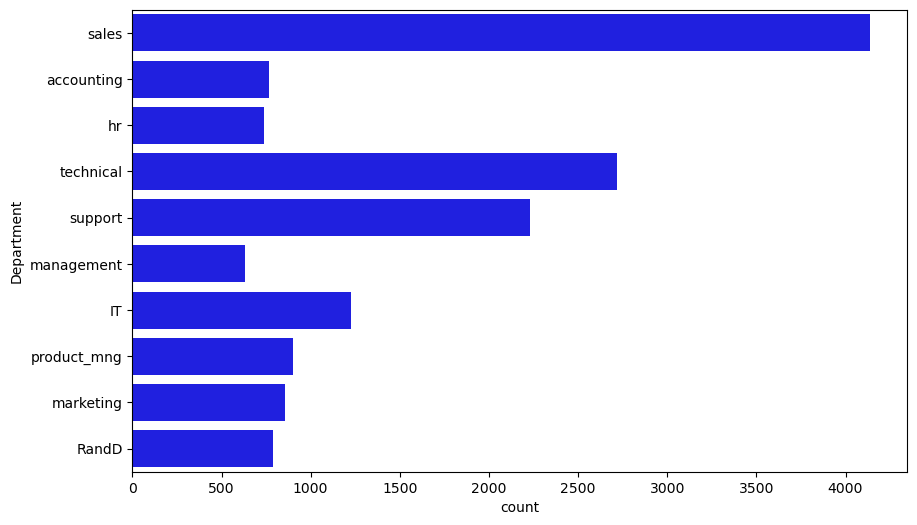

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['Department'],color='blue')

<Axes: xlabel='count', ylabel='salary'>

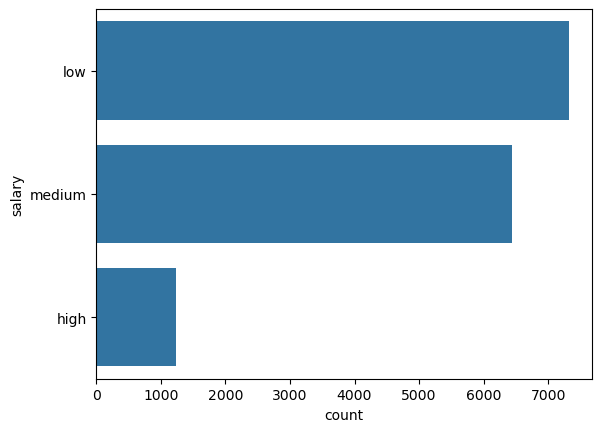

In [14]:
sns.countplot(df['salary'])

In [16]:
df[['RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng',
       'sales', 'support', 'technical']]=pd.get_dummies(df['Department'],drop_first=True,dtype=int)

In [19]:
df.drop('Department',axis=1,inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
df['salary']=le.fit_transform(df['salary'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  int32  
 9   RandD                  14999 non-null  int32  
 10  accounting             14999 non-null  int32  
 11  hr                     14999 non-null  int32  
 12  management             14999 non-null  int32  
 13  marketing              14999 non-null  int32  
 14  product_mng            14999 non-null  int32  
 15  sa

In [29]:
X=df.drop('salary',axis=1)
y=df['salary']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)

In [35]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.13      0.20       253
           1       0.52      0.81      0.63      1484
           2       0.45      0.21      0.29      1263

    accuracy                           0.50      3000
   macro avg       0.48      0.38      0.37      3000
weighted avg       0.48      0.50      0.45      3000



In [37]:
from sklearn.ensemble import RandomForestClassifier

nb=RandomForestClassifier()

nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.35      0.49       253
           1       0.65      0.71      0.68      1484
           2       0.61      0.60      0.61      1263

    accuracy                           0.64      3000
   macro avg       0.69      0.56      0.59      3000
weighted avg       0.64      0.64      0.63      3000



In [39]:
import streamlit as st
import joblib


In [44]:
pickle_model = joblib.dump(nb,'salary_pred_rb.pkl')

In [ ]:
pickle_model = joblib.dump(nb,'salary_pred_rb.pkl')